### Análise inicial do jogo da mega-sena

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
from matplotlib.backends.backend_pdf import PdfPages
import pdfkit

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
apostas = pd.read_excel("Mega_sena_ate_2585.xlsx")
apostas.head(5)

,Concurso,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2585,14,26,34,36,43,59
1,2584,1,5,12,36,53,55
2,2583,2,20,27,30,52,59
3,2582,10,14,17,19,21,34
4,2581,14,17,32,36,39,60


#### O Selenium WebDriver usa o próprio driver do navegador para a automação.Sera utilizado para pegar os números do último sorteio e atualizar os dados. Essa prática é para treino, já que o Xpath não parace ser constante, não sendo, portanto, uma abordagem prática


In [6]:
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [7]:
service = Service(executable_path="/usr/local/bin/chromedriver") #criação de objeto

##### Uso do Selenium para automatizar a busca do último resultado da MEGA SENA

In [16]:
with webdriver.Chrome(service=service) as driver:
    #navigate to the url
    driver.get('https://www.google.com/')
    #find element by xpath
    pesquisa = driver.find_element(By.XPATH,'//*[@id="APjFqb"]')
    pesquisa.send_keys("mega sena")
    pesquisa.send_keys(Keys.ENTER)

    
    novo_bola1 = driver.find_element(By.XPATH,'//*[@id="tsuid_30"]/span/div/div/div/div/div[2]/div/div[1]/div/div[1]/div/div/span[1]')
    print(novo_bola1.text)  
    novo_bola2 = driver.find_element(By.XPATH,'//*[@id="tsuid_30"]/span/div/div/div/div/div[2]/div/div[1]/div/div[1]/div/div/span[2]')
    print(novo_bola2.text)
    novo_bola3 = driver.find_element(By.XPATH,'//*[@id="tsuid_30"]/span/div/div/div/div/div[2]/div/div[1]/div/div[1]/div/div/span[3]')
    print(novo_bola3.text)
    novo_bola4 = driver.find_element(By.XPATH,'//*[@id="tsuid_30"]/span/div/div/div/div/div[2]/div/div[1]/div/div[1]/div/div/span[4]')
    print(novo_bola4.text)
    novo_bola5 = driver.find_element(By.XPATH,'//*[@id="tsuid_30"]/span/div/div/div/div/div[2]/div/div[1]/div/div[1]/div/div/span[5]')
    print(novo_bola5.text)
    novo_bola6 = driver.find_element(By.XPATH,'//*[@id="tsuid_30"]/span/div/div/div/div/div[2]/div/div[1]/div/div[1]/div/div/span[6]')
    print(novo_bola6.text)
    
    driver.quit()

10
18
41
49
53
59


In [26]:
apostas[0:1]

,Concurso,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2585,14,26,34,36,43,59


In [28]:
# Função para inserir nova linha no dataframe 
def inserir_linha(index_linha, df, valor_linha):
    # verificando se o index passado é valido
    if index_linha > df.index.max()+1:
        print("Linha não existente")
    #Dividindo o dataframe 
    else:
        df1 = df[0:index_linha] #parte de cima sendo criada
        # Parte de baixo 
        df2 = df[index_linha:] 

        # Inserindo a linha na parte de cima I
        df1.loc[index_linha]=valor_linha

        # Juntando
        df_result = pd.concat([df1, df2])
        # Arrumando o index
        df_result.index = [*range(df_result.shape[0])]
        #The * "unpacks" an iterable, so that each element is passed as a separate argument, 
        #rather than the function receiving the iterable object as a single argument

        # Retorna o novo dataframe
        return df_result

In [17]:
print(f" O numero total de linhas da tabela é {(len(apostas))}")
print(f" Indice max = {apostas.index.max()}")

 O numero total de linhas da tabela é 2585
 Indice max = 2584


In [24]:
max(apostas['Concurso'])

2585

In [29]:
# linha que quero inserir
index_linha = 0  # ou seja, a parte de cima vai ser so o "cabecalho"
valor_linha = [(max(apostas['Concurso'])+1),10,18,41,49,53,59]  #numeros encontrados com o selenium

# chamada da função para acrescimo da linha na posição 0
apostas2= inserir_linha(0, apostas, valor_linha)


In [30]:
apostas2.head(3)

,Concurso,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2586,10,18,41,49,53,59
1,2585,14,26,34,36,43,59
2,2584,1,5,12,36,53,55


In [32]:
apostas2.to_excel("Mega_sena_ate_2586.xlsx", index=False)

In [33]:
#Pegando os 10 valores mais sorteados de cada bola

dfb1 = apostas2['bola 1'].value_counts().head(10).rename_axis('Número sorteado').reset_index()
dfb2 = apostas2['bola 2'].value_counts().head(10).rename_axis('Número sorteado').reset_index()
dfb3 = apostas2['bola 3'].value_counts().head(10).rename_axis('Número sorteado').reset_index()
dfb4 = apostas2['bola 4'].value_counts().head(10).rename_axis('Número sorteado').reset_index()
dfb5 = apostas2['bola 5'].value_counts().head(10).rename_axis('Número sorteado').reset_index()
dfb6 = apostas2['bola 6'].value_counts().head(10).rename_axis('Número sorteado').reset_index()
data_frames = [dfb1, dfb2, dfb3,dfb4,dfb5,dfb6]

In [39]:
#verificando
dfb1

,Número sorteado,bola 1
0,28,60
1,4,58
2,49,54
3,32,53
4,47,52
5,35,52
6,2,51
7,30,51
8,25,50
9,20,50


In [34]:
type(data_frames)

list

In [35]:
import functools


###### A função reduce() 
Em python pega uma função predefinida e a aplica a todos os elementos em um iterável  (por exemplo, lista, tupla, dicionário, etc.) e calcula um resultado de valor único. Essa saída de valor  único resulta da aplicação da função de redução no iterável passado como um argumento;  apenas um único inteiro, string ou booleano é retornado. (É como se fosse um *** for loop ***)

###### Função lambda 
São pequenas funções anônimas definidas usando a palavra-chave lambda. Indicado para quando se vai usar a função vez no código

###### Função Merge
“Mesclar” dois conjuntos de dados é o processo de reunir dois conjuntos de dados em um e alinhar as linhas de cada um com base em atributos ou colunas comuns.
 - Inner Merge  – The default Pandas behaviour, only keep rows where the merge “on” value exists in both the left and right dataframes.
 - Left Merge  – Keep every row in the left dataframe. Where there are missing values of the “on” variable in the right dataframe, add empty / NaN values in the result.
 - Right Merge
 - Outer Merge  – A full outer join returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere.

### Criar novo dataframe com os valores mais recorrentes

<img src = "reduce.png">

In [40]:
#juntando em um unico dataframe os dataframes de cada bola feitos acima por "numero sorteado"
df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['Número sorteado'],
                                            how='outer'), data_frames)
df_merged.round(decimals=0)
df_merged.head(3)

,Número sorteado,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,28,60.0,NaN,NaN,NaN,NaN,NaN
1,4,58.0,NaN,50.0,NaN,NaN,NaN
2,49,54.0,NaN,NaN,NaN,NaN,NaN


In [41]:
len(df_merged.index)


41

In [43]:
df_merged.isnull().sum(axis=1) #Analisando quandos NAN tem em cada linha 

0     5
1     4
2     5
3     4
4     5
5     4
6     5
7     4
8     5
9     5
10    4
11    2
12    5
13    3
14    5
15    5
16    5
17    5
18    5
19    5
20    5
21    4
22    4
23    5
24    4
25    4
26    4
27    4
28    5
29    5
30    5
31    5
32    4
33    5
34    4
35    4
36    5
37    5
38    5
39    5
40    5
dtype: int64

In [44]:
df_merged.set_index('Número sorteado', inplace = True)
nullpor_linha = df_merged.isnull().sum(axis=1) ## quantidade de NaN por linha
faltantes= nullpor_linha.to_frame(name="Vezes não sorteado(linhas)") #converte serie para dataframe e da nome a coluna
faltantes.head(3)

,Vezes não sorteado(linhas)
Número sorteado,
28,5
4,4
49,5


In [45]:
data_frames2 = [df_merged,faltantes] 

In [46]:
type(data_frames2)

list

In [49]:
#juntando o os dataframes merged e faltantes
juntando_faltantes = functools.reduce(lambda  left,right: pd.merge(left,right,on=['Número sorteado'],
                                            how='outer'), data_frames2)
freq_freq = juntando_faltantes.sort_values('Vezes não sorteado(linhas)') # organizado por menos vezes não sorteadas
freq_freq.head(4)

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,Vezes não sorteado(linhas)
Número sorteado,,,,,,,
10,NaN,60.0,NaN,50.0,53.0,50.0,2
53,NaN,55.0,NaN,51.0,NaN,55.0,3
38,NaN,NaN,51.0,NaN,54.0,NaN,4
44,NaN,NaN,NaN,50.0,53.0,NaN,4


In [50]:
#Substituindo os NaN
organizando_freq= freq_freq.fillna('Não sorteado').round(0)

In [130]:
def style_negative(v, props='color:white; font-weight:150;background-color: ffbfb1'):
    return props if v == "Não sorteado" else None

frequencia_megasena=organizando_freq.style.set_properties( **{'width': '120px'}).set_table_attributes('border=1 cellspacing=0 class="pure-table"').set_properties(**{'color': 'black',
                           'border-color': 'grey','text-align':'center','font-weight':'bold','background-color': '#adff92'}).applymap(style_negative).set_precision(0).set_caption("MEGA SENA- Valores mais sorteados até o sorteio de numero 2586") 
html_df = frequencia_megasena.render()
with open("frequencia_megasena_2586.html","w") as fp:
    fp.write(html_df)

In [129]:
from IPython.display import IFrame
IFrame("frequencia_megasena.html", width=600, height=300)

In [69]:

dfb11 = apostas2['bola 1'].value_counts().head(1).rename_axis('Número sorteado').reset_index()
dfb21 = apostas2['bola 2'].value_counts().head(1).rename_axis('Número sorteado').reset_index()
dfb31 = apostas2['bola 3'].value_counts().head(1).rename_axis('Número sorteado').reset_index()
dfb41 = apostas2['bola 4'].value_counts().head(1).rename_axis('Número sorteado').reset_index()
dfb51 = apostas2['bola 5'].value_counts().head(1).rename_axis('Número sorteado').reset_index()
dfb61 = apostas2['bola 6'].value_counts().head(1).rename_axis('Número sorteado').reset_index()
data_frames11 = [dfb11, dfb21, dfb31,dfb41,dfb51,dfb61]

In [135]:
df_merged2 = functools.reduce(lambda  left,right: pd.merge(left,right,on=['Número sorteado'],
                                            how='outer'), data_frames11)
df_merged2.round(decimals=0)
df_merged2

,Número sorteado,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,28,60.0,NaN,NaN,NaN,NaN,NaN
1,5,NaN,63.0,NaN,NaN,NaN,NaN
2,27,NaN,NaN,59.0,NaN,NaN,NaN
3,29,NaN,NaN,NaN,59.0,NaN,NaN
4,35,NaN,NaN,NaN,NaN,61.0,NaN
5,23,NaN,NaN,NaN,NaN,NaN,58.0


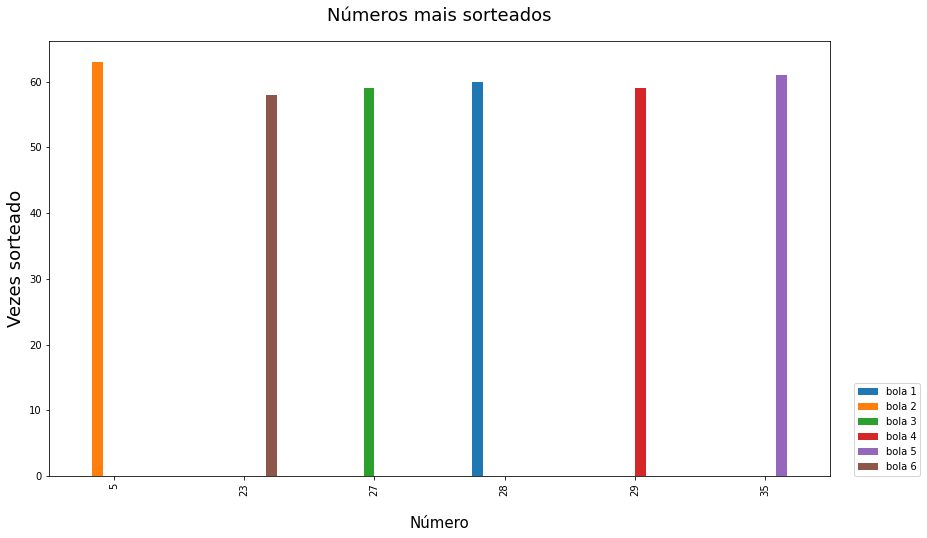

In [137]:
#valores que mais sairam em cada bola
primeiros = df_merged2.groupby(['Número sorteado']).sum()
primeiros.plot.bar(figsize=(14, 8))
plt.title('Números mais sorteados',fontsize=18,pad=20)
plt.legend (ncol = 1, loc= (1.03, 0),fontsize=10)
plt.xlabel('Número', fontsize=15, labelpad =20)
plt.ylabel('Vezes sorteado', fontsize=18)

plt.show()

